In [ ]:
'''
建立模型四步驟
在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)

讀取資料的方法：
使用 pandas 讀取 .csv 檔：pd.read_csv
使用 numpy 讀取 .txt 檔：np.loadtxt
使用 Scikit-learn 內建的資料集：sklearn.datasets.load_xxx

檢查資料數量：data.shape (data should be np.array or dataframe)

將資料切為訓練 (train) / 測試 (test)
train_test_split(data)

建立模型，將資料 fit 進模型開始訓練
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
clf.predict(x_test)
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred)

'''


In [ ]:
'''
決策樹的超參參數

criterion: 衡量量資料相似程度的metric 
max_depth: 樹能⽣生長的最深限制
min_samples_split: ⾄至少要多少樣本以上才進⾏行行切分
min_samples_lear: 最終的葉⼦子 (節點) 上⾄至少要有多少樣本

'''

In [28]:
from sklearn import datasets, metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

In [29]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

In [30]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
x=pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [32]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [33]:
x.shape

(150, 4)

In [34]:
y=pd.DataFrame(iris['target'],columns=['target'])

In [35]:
y

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [36]:
y.shape

(150, 1)

In [37]:
iris_data=pd.concat([x,y],axis=1)

In [38]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [39]:
#iris_data=iris_data[['sepal length (cm)','petal length (cm)','target']]

In [40]:
#iris_data

In [41]:
iris_data=iris_data[iris_data['target'].isin([0,1,2])]

In [42]:
iris_data.shape

(150, 5)

In [43]:
x_train, x_test, y_train, y_test =train_test_split(iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [44]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
#tree=DecisionTreeClassifier()

In [45]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [46]:
tree.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [47]:
y_test['target'].values

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [48]:
tree.score(x_test, y_test['target'])

0.9111111111111111

In [49]:
from sklearn.tree import export_graphviz

In [50]:
export_graphviz(tree, out_file='tree.dot', feature_names=('sepal length (cm)','petal length (cm)'))

In [51]:
tree.score(x_test, y_test['target'])

0.9111111111111111

In [52]:
from IPython.display import Image  
import pydotplus

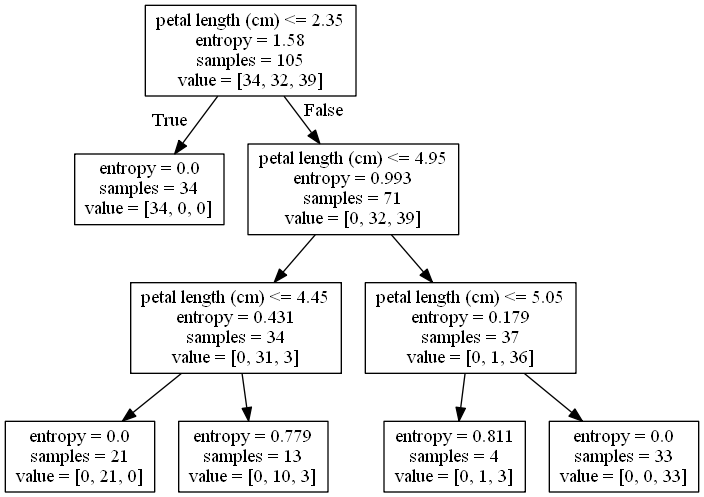

In [53]:
dot_data =export_graphviz(tree, out_file=None, 
                         feature_names=('sepal length (cm)','petal length (cm)'))  
                       

graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

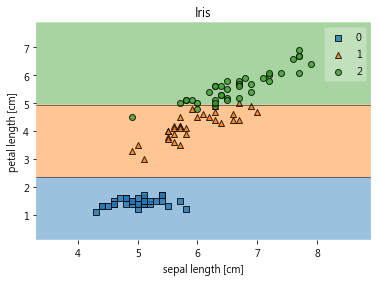

In [54]:
from mlxtend.plotting import plot_decision_regions

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Iris')
        
plot_decision_regions(x_train.values, y_train['target'].values, clf=tree)